<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-[Chapter-04]-분류" data-toc-modified-id="1.-[Chapter-04]-분류-1">1. [Chapter 04] 분류</a></span><ul class="toc-item"><li><span><a href="#1.1-분류의-개요" data-toc-modified-id="1.1-분류의-개요-1.1">1.1 분류의 개요</a></span></li><li><span><a href="#1.2-결정-트리" data-toc-modified-id="1.2-결정-트리-1.2">1.2 결정 트리</a></span><ul class="toc-item"><li><span><a href="#1.2.1-결정-트리-파라미터" data-toc-modified-id="1.2.1-결정-트리-파라미터-1.2.1">1.2.1 결정 트리 파라미터</a></span></li><li><span><a href="#1.2.2-결정-트리-모델의-시각화" data-toc-modified-id="1.2.2-결정-트리-모델의-시각화-1.2.2">1.2.2 결정 트리 모델의 시각화</a></span></li><li><span><a href="#1.2.3-결정-트리-과적합" data-toc-modified-id="1.2.3-결정-트리-과적합-1.2.3">1.2.3 결정 트리 과적합</a></span></li><li><span><a href="#1.2.4-결정-트리-실습---사용자-행동-인식-데이터-세트" data-toc-modified-id="1.2.4-결정-트리-실습---사용자-행동-인식-데이터-세트-1.2.4">1.2.4 결정 트리 실습 - 사용자 행동 인식 데이터 세트</a></span></li></ul></li><li><span><a href="#1.3-앙상블-학습" data-toc-modified-id="1.3-앙상블-학습-1.3">1.3 앙상블 학습</a></span><ul class="toc-item"><li><span><a href="#1.3.1-보팅---하드-보팅과-소프트-보팅" data-toc-modified-id="1.3.1-보팅---하드-보팅과-소프트-보팅-1.3.1">1.3.1 보팅 - 하드 보팅과 소프트 보팅</a></span></li><li><span><a href="#1.3.2-보팅-분류기" data-toc-modified-id="1.3.2-보팅-분류기-1.3.2">1.3.2 보팅 분류기</a></span></li></ul></li><li><span><a href="#1.4-랜덤-포레스트" data-toc-modified-id="1.4-랜덤-포레스트-1.4">1.4 랜덤 포레스트</a></span></li><li><span><a href="#1.5-GBM(Gradient-Boosting-Machine)" data-toc-modified-id="1.5-GBM(Gradient-Boosting-Machine)-1.5">1.5 GBM(Gradient Boosting Machine)</a></span></li><li><span><a href="#1.6-XGBoost(eXtra-Gradient-Boost)" data-toc-modified-id="1.6-XGBoost(eXtra-Gradient-Boost)-1.6">1.6 XGBoost(eXtra Gradient Boost)</a></span></li><li><span><a href="#1.7-LightGBM" data-toc-modified-id="1.7-LightGBM-1.7">1.7 LightGBM</a></span></li><li><span><a href="#1.8-캐글-산탄데르-고객-만족-예측" data-toc-modified-id="1.8-캐글-산탄데르-고객-만족-예측-1.8">1.8 캐글 산탄데르 고객 만족 예측</a></span></li><li><span><a href="#1.9-캐글-신용카드-사기-검출" data-toc-modified-id="1.9-캐글-신용카드-사기-검출-1.9">1.9 캐글 신용카드 사기 검출</a></span></li><li><span><a href="#1.10-스태킹-앙상블" data-toc-modified-id="1.10-스태킹-앙상블-1.10">1.10 스태킹 앙상블</a></span></li></ul></li></ul></div>

# 1. [Chapter 04] 분류

## 1.1 분류의 개요

분류는 나이브 베이즈, 로지스틱 회귀, 결정 트리, 서포트 벡터 머신(SVM), 최소 근접 알고리즘, 신경망, 앙상블 등 다양한 머신러닝 알고리즘으로 구현 가능

이번 장에서는 **정형 데이터의 예측 분석 영역에서 각광받고 있는 앙상블 방법을 집중적으로 소개**

앙상블은 배깅 (랜덤 포레스트) 과 부스팅 (그래디언트 부스팅, XgBoost, LightGBM) 방식으로 나뉘며, 일반적으로 결정 트리를 기본 알고리즘으로 사용

## 1.2 결정 트리

- 결정 트리 : 학습을 통해 데이터의 규칙을 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것

    장점 - 쉽고 직관적이며, 데이터 스케일링이나 정규화 등의 영향이 매우 적음

    단점 - 복잡한 규칙 구조로 인한 과적합이 발생해 예측 성능이 떨어질 수 있으므로, 트리의 크기를 사전에 제한할 필요가 있음


앙상블은 여러 개의 약한 학습기를 결합해 확률적 보완과 오류에 대한 가중치를 계속 업데이트하는데, 이 때 결정 트리의 단점이 오히려 장점으로 작용

**가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 최대한 균일한 데이터 세트를 구성할 수 있도록 해야 함**

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만들며, 균일도를 측정하는 방법으로 정보 이득 지수와 지니 계수가 있음

- 정보 이득 지수 = 1 - 엔트로피 지수 (cf) 엔트로피 : 데이터 집합의 혼잡도)


- 지니 계수 : 불평등을 나타낼 때 사용하는 계수로, 낮을수록 데이터 균일도가 높은 것으로 해석

**결정 트리의 알고리즘은 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분류**

### 1.2.1 결정 트리 파라미터

사이킷런의 결정 트리 구현은 CART(Classification And Regression Trees) 알고리즘 기반으로, 이는 회귀에서도 사용될 수 있는 트리 알고리즘

- min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수. 디폴트는 2이고 작게 설정할수록 분할 노드가 많아져 과적합 가능성 증가


- min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수. 비대칭적 데이터의 경우 작게 설정 필요


- max_features : 최적의 분할을 위해 고려할 최대 피처 개수


- max_depth : 트리의 최대 깊이


- max_leaf_nodes : 말단 노드의 최대 개수

### 1.2.2 결정 트리 모델의 시각화

- https://graphviz.gitlab.io/_pages/Download/Download_windows.html 에서 윈도우 버전의 Graphviz 설치


- Anaconda Prompt 를 관리자 권한으로 실행하여 'pip install praphviz' 입력하여 모듈 설치


- Graphviz와 파이썬 래퍼를 연결하기 위해 내 PC - 속성 - 고급 시스템 설정 - 환경변수 클릭


- 사용자 변수의 Path에 Graphviz 파일이 설치된 디렉터리 안의 bin 파일 경로 추가


- 시스템 변수의 Path에 Graphviz 파일이 설치된 디렉터리 안의 bin\dot.exe 파일 경로 추가 후 주피터 노트북 다시 로딩

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

**export_graphviz()는 그래프 형태로 시각화할 수 있는 출력 파일 생성**

학습 완료된 estimator, output 파일명, 결정 클래스 명칭, 피처 명칭을 인자로 입력

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)

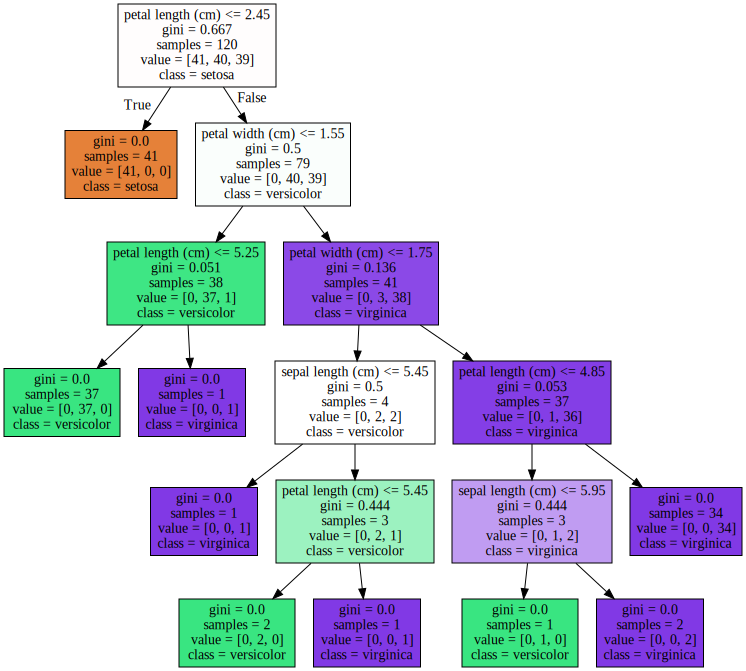

In [3]:
import graphviz

# tree.dot 파일을 Graphviz가 읽어서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- petal length(cm) <= 2.45 는 자식 노드를 만들기 위한 규칙 조건으로, 조건이 없으면 리프 노드


- gini : 지니 계수, samples : 현 규칙에 해당하는 데이터 건수


- value : 클래스 값 기반의 데이터 건수 (ex) [0, 2, 0]이라면 Setosa 0개, Versicolor 2개, Virginica 0개)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


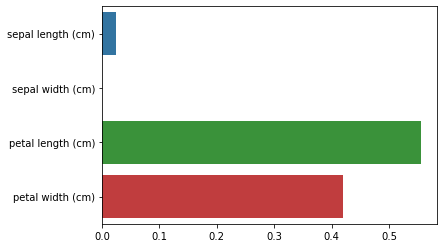

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature_importances_ 속성으로 피처별 중요도 값을 매핑하고 막대그래프로 표현
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### 1.2.3 결정 트리 과적합

**make_classification() 으로 분류를 위한 테스트용 데이터 쉽게 생성**

함수 호출 시 피처 데이터 세트와 클래스 레이블 데이터 세트 반환

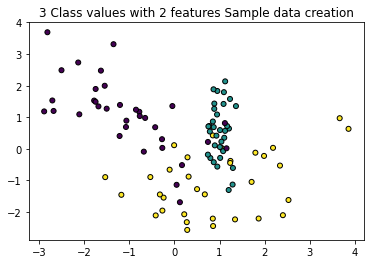

In [6]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 features Sample data creation')

# 2차원 시각화를 위해 피처 2개, 클래스 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, \
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 2개의 피처로 2차원 좌표 시각화 (클래스별 다른 색깔 사용)
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

visualize_boundary()를 생성하여 결정 트리 모델의 결정 기준을 색상과 경계로 나타내고, 모델이 어떻게 분류하는지 파악

In [8]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

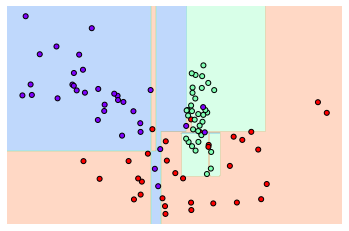

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

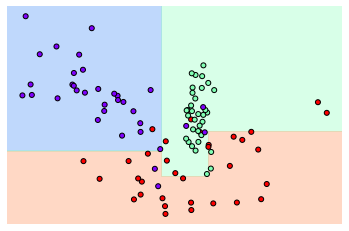

In [10]:
# min_samples_leaf = 6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### 1.2.4 결정 트리 실습 - 사용자 행동 인식 데이터 세트

- http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones 에서 UCI HAR Dataset.zip 파일 다운로드


- UCI HAR Dataset 폴더명에 공백이 있는 관계로 human_activity로 변경

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 피처 이름 index와 피처명이 공백으로 분리되어 있는 features.txt 파일 로드
feature_name_df = pd.read_csv('./data/human_activity/features.txt', sep='\s+',\
                             header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성하여 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [13]:
# features_info.txt 파일의 중복된 피처명 파악
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [14]:
# 중복된 피처명에 번호를 부여해 새로운 피처명을 가지는 df를 반환하는 함수 생성
def get_new_name_df(old_name_df):
    feature_dup_df = pd.DataFrame(data=old_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_name_df = pd.merge(old_name_df.reset_index(), feature_dup_df, how='outer')
    new_name_df['column_name'] = new_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])\
                                                                               if x[1]>0 else x[0], axis=1)
    new_name_df = new_name_df.drop(['index'], axis=1)
    return new_name_df

In [15]:
import pandas as pd

# train, test 디렉터리에 있는 데이터를 각각 학습용, 테스트용 df에 로드하는 함수 생성
def get_human_dataset():
    feature_name_df = pd.read_csv('./data/human_activity/features.txt', sep='\s+',
                                  header=None, names=['column_index', 'column_name'])
    new_name_df = get_new_name_df(feature_name_df)
    feature_name = new_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('./data/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./data/human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    y_train = pd.read_csv('./data/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./data/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [16]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [17]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))
print('결정 트리 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
결정 트리 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [26]:
# GridSearchCV를 이용해 max_depth 값을 변화시키면서 예측 성능 확인
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [6,8,10,12,16,20,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.7min finished


GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 16}


max_depth가 16일 때 5개 폴드 세트의 최고 평균 정확도가 약 85.13%로 도출

In [27]:
# CV 세트에 하이퍼 파라미터를 순차적으로 입력했을 때의 성능 수치를 df로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [28]:
# 별도의 테스트 데이터 세트에서 결정 트리의 정확도 측정
max_depths = [6,8,10,12,16,20,24]
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


max_depth가 8일 경우 약 87.07%로 가장 높은 정확도를 나타냄

**결정 트리는 깊이가 깊어질수록 과적합의 영향력이 커지므로 정확도가 더 떨어짐**

In [30]:
# max_depth와 min_samples_split으로 정확도 성능 튜닝
params = {'max_depth': [8,12,16,20],
          'min_samples_split': [16,24]}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.1min finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_split': 16}


In [31]:
# 테스트 데이터 세트에 해당 하이퍼 파라미터 적용
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy  = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8717


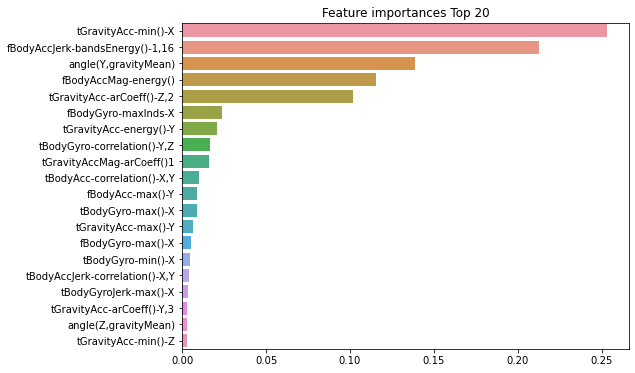

In [32]:
import seaborn as sns

# 중요도가 높은 순으로 Top 20 피처를 막대그래프로 표현
ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 1.3 앙상블 학습

- 앙상블 학습 : 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
    
    보팅 - 서로 다른 알고리즘을 가진 분류기를 결합하여 투표를 통해 최종 예측 결과를 결정하는 방식
    
    배깅 - 같은 유형의 알고리즘을 기반으로 데이터 샘플링을 서로 다르게 가져가면서 학습하여 보팅을 수행하는 방식 (ex) 랜덤 포레스트)
    
    부스팅 - 여러 개의 분류기가 순차적으로 학습하며, 예측이 틀린 데이터에 대해 가중치를 부여하여 학습과 예측을 진행하는 방식 (ex) 그래디언트 부스트, XGBoost, LightGBM)
    
    스태킹 - 여러 모델의 예측 결괏값을 다시 학습 데이터로 만들어 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방식

### 1.3.1 보팅 - 하드 보팅과 소프트 보팅

- 하드 보팅 : 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정


- 소프트 보팅 : 분류기들의 레이블 값 결정 확률들의 평균을 내어 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정 (일반적)

### 1.3.2 보팅 분류기

In [4]:
# 보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트 예측
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [6]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474


In [7]:
# 개별 모델(로지스틱 회귀, KNN)의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


보팅 분류기의 정확도가 약 94.74%로 조금 높게 나타남

보팅과 스태킹 등은 서로 다른 알고리즘을 기반으로 하지만, 배깅과 부스팅은 대부분 결정 트리 알고리즘을 기반으로 함

**앙상블 학습에서는 결정 트리 알고리즘의 과적합 단점을 보완하여 편향-분산 트레이드오프의 효과를 극대화할 수 있음**

## 1.4 랜덤 포레스트

## 1.5 GBM(Gradient Boosting Machine)

## 1.6 XGBoost(eXtra Gradient Boost)

## 1.7 LightGBM

## 1.8 캐글 산탄데르 고객 만족 예측

## 1.9 캐글 신용카드 사기 검출

## 1.10 스태킹 앙상블